## Auto-encoders 

Author : Ines Krissaane 

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense,  Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Reshape, Lambda, Flatten, Activation, Dropout
from tensorflow.keras import Model
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [2]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import glob
from sklearn import linear_model
import datetime
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import learning_curve, GridSearchCV
from random import sample 
from sklearn.linear_model import LogisticRegression

## Import data and pre-processing (cf 1.Pre-processing.ipynb and 2.RandomForest.ipynb)

In [3]:
X_tr = pd.read_csv('SEPSIS_ALL.csv')
X_tr.shape

(1552210, 43)

In [4]:
X_tr.columns

Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'ID'],
      dtype='object')

In [5]:
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb',  'Unnamed: 0','Fibrinogen', 'Platelets',
 'Unit1', "Unit2"], axis = 1, inplace = True)


data = X_tr[(X_tr['Bilirubin_direct']).notnull()]
data2 = X_tr[(X_tr['Lactate']).notnull()]
data3 = X_tr[(X_tr['PTT']).notnull()] 
data4 = X_tr[(X_tr['Creatinine']).notnull()] 
data5 = X_tr[(X_tr['WBC']).notnull()] 
data6 = X_tr[(X_tr['Glucose']).notnull()]
#healthy patients
BR_healthy = sum(data[data.SepsisLabel ==0].Bilirubin_direct)/len(data[data.SepsisLabel ==0].Bilirubin_direct)
lact_healthy = sum(data2[data2.SepsisLabel ==0].Lactate)/len(data2[data2.SepsisLabel ==0].Lactate)
ptt_healthy = sum(data3[data3.SepsisLabel ==0].PTT)/len(data3[data3.SepsisLabel ==0].PTT)
creat_healthy = sum(data4[data4.SepsisLabel ==0].Creatinine)/len(data4[data4.SepsisLabel ==0].Creatinine)
WBC_healthy = sum(data5[data5.SepsisLabel ==0].WBC)/len(data5[data5.SepsisLabel ==0].WBC)
glucose_healthy = sum(data6[data6.SepsisLabel ==0].Glucose)/len(data6[data6.SepsisLabel ==0].Glucose)

# sepsis patients
BR_sepsis = sum(data[data.SepsisLabel ==1].Bilirubin_direct)/len(data[data.SepsisLabel ==1].Bilirubin_direct)
lact_sepsis = sum(data2[data2.SepsisLabel ==1].Lactate)/len(data2[data2.SepsisLabel ==1].Lactate)
ptt_sepsis= sum(data3[data3.SepsisLabel ==1].PTT)/len(data3[data3.SepsisLabel ==1].PTT)
creat_sepsis = sum(data4[data4.SepsisLabel ==1].Creatinine)/len(data4[data4.SepsisLabel ==1].Creatinine)
WBC_sepsis = sum(data5[data5.SepsisLabel ==1].WBC)/len(data5[data5.SepsisLabel ==1].WBC)
glucose_sepsis = sum(data6[data6.SepsisLabel ==1].Glucose)/len(data6[data6.SepsisLabel ==1].Glucose)
healthy = X_tr[X_tr.SepsisLabel == 0]
sepsis = X_tr[X_tr.SepsisLabel == 1]

healthy['Bilirubin_direct'].fillna(value=BR_healthy, inplace=True)
healthy['Lactate'].fillna(value=lact_healthy, inplace=True)
healthy['PTT'].fillna(value=ptt_healthy, inplace=True)
healthy['Creatinine'].fillna(value=creat_healthy, inplace=True)
healthy['WBC'].fillna(value=WBC_healthy, inplace=True)
healthy['Glucose'].fillna(value=glucose_healthy , inplace=True)

sepsis['Bilirubin_direct'].fillna(value=BR_sepsis, inplace=True)
sepsis['Lactate'].fillna(value=lact_sepsis, inplace=True)
sepsis['PTT'].fillna(value=ptt_sepsis, inplace=True)
sepsis['Creatinine'].fillna(value=creat_sepsis, inplace=True)
sepsis['WBC'].fillna(value=WBC_sepsis, inplace=True)
sepsis['Glucose'].fillna(value=glucose_sepsis, inplace=True)


sepsis.fillna(method='bfill', inplace=True)
sepsis.fillna(method='ffill', inplace=True)
healthy.fillna(method='bfill', inplace=True)
healthy.fillna(method='ffill', inplace=True)

X_tr = pd.concat([sepsis, healthy]).sort_index()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [6]:
# Remove variables with more than 82% of na.
X_tr.drop(["HospAdmTime",'O2Sat'], axis = 1, inplace = True)

In [7]:
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

In [8]:
X_tr.head()

,HR,Temp,SBP,MAP,DBP,Resp,Creatinine,Bilirubin_direct,Glucose,Lactate,PTT,WBC,Age,Gender,ICULOS,SepsisLabel,ID
0,97.0,36.11,98.0,75.33,43.0,19.0,1.502821,1.790182,136.871742,2.642708,41.155191,11.401411,83.14,0,1,0,p000001.psv
1,97.0,36.11,98.0,75.33,43.0,19.0,1.502821,1.790182,136.871742,2.642708,41.155191,11.401411,83.14,0,2,0,p000001.psv
2,89.0,36.11,122.0,86.00,43.0,22.0,1.502821,1.790182,136.871742,2.642708,41.155191,11.401411,83.14,0,3,0,p000001.psv
3,90.0,36.11,122.0,91.33,43.0,30.0,1.502821,1.790182,136.871742,2.642708,41.155191,11.401411,83.14,0,4,0,p000001.psv
4,103.0,36.11,122.0,91.33,43.0,24.5,1.502821,1.790182,136.871742,2.642708,41.155191,11.401411,83.14,0,5,0,p000001.psv


In [9]:
X_tr.shape

(1552210, 17)

## Anomaly Detection using Autoencoders

- https://arxiv.org/pdf/1811.05269.pdf
- https://core.ac.uk/download/pdf/81634504.pdf

In [104]:
normal = X_tr[X_tr['SepsisLabel'] == 0]
anormal = X_tr[X_tr['SepsisLabel'] == 1]

list_anormal = list(anormal.ID.unique() )
list_normal = list(normal.ID.unique() )
df = X_tr
for i in (list_anormal):
    df = df[df.ID != i]

normal = df
list_normal = list(normal.ID.unique())

In [114]:
len(list_normal)

37404

In [107]:
from random import sample 
list_validation_normal = sample(list_normal,5000)
list_validation_anormal = sample(list_anormal,500)

In [109]:
df = normal
for i in (list_validation_normal):
    df = df[df.ID != i]
normal =df 

In [110]:
len(normal.ID.unique())

32404

In [112]:
df = anormal
for i in (list_validation_anormal):
    df = df[df.ID != i]
anormal =df 

In [113]:
len(anormal.ID.unique())

2432

In [132]:
normal.drop(['ID'], axis = 1, inplace = True)

In [133]:
# train only on healthy patients 
RANDOM_SEED = 101
X_train, X_test = train_test_split(normal, test_size=0.3, random_state = RANDOM_SEED)
y_train = X_train.SepsisLabel
X_train.drop(['SepsisLabel'], axis=1,  inplace = True)
y_test = pd.concat([X_test.SepsisLabel,anormal.SepsisLabel])
X_test = pd.concat([X_test, anormal], axis=0)
X_test.drop(['SepsisLabel', 'ID'], axis=1,  inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [134]:
X_train = X_train.values
X_test  = X_test.values
print('Training data size   :', X_train.shape)
print('Validation data size :', X_test.shape)
      

Training data size   : (836639, 15)
Validation data size : (381675, 15)


In [135]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [137]:
# Our NN
input_dim = X_train.shape[1]
encoding_dim = 56

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="softmax")(input_layer)
encoder = Dense(int(encoding_dim * 7), activation="softmax")(encoder)

encoder = Dense(int(encoding_dim * 14), activation="tanh")(encoder)
#decoder = Dense(int(encoding_dim*7), activation='tanh')(encoder)


#encoder = Dense(int(2), activation="tanh")(encoder)
#decoder = Dense(int(encoding_dim/ 2), activation='tanh')(encoder)
decoder = Dense(int(encoding_dim), activation='softmax')(encoder)
decoder = Dense(input_dim, activation='softmax')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 56)                896       
_________________________________________________________________
dense_9 (Dense)              (None, 392)               22344     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               308112    
_________________________________________________________________
dense_11 (Dense)             (None, 56)                43960     
_________________________________________________________________
dense_12 (Dense)             (None, 15)                855       
Total params: 376,167
Trainable params: 376,167
Non-trainable params: 0
_____________________________________________________

In [138]:
# train it

#class_weights=  {0: 1.,
             #   1: 10.}

nb_epoch = 100
batch_size = 1000
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch, 
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 836639 samples, validate on 381675 samples
Epoch 1/100
836639/836639 [==============================] - 16s 19us/sample - loss: 4151.3080 - acc: 0.4261 - val_loss: 4192.2003 - val_acc: 0.0000e+00
Epoch 2/100
836639/836639 [==============================] - 15s 18us/sample - loss: 4146.2296 - acc: 0.6891 - val_loss: 4193.2334 - val_acc: 0.0000e+00
Epoch 3/100
836639/836639 [==============================] - 16s 19us/sample - loss: 4145.1412 - acc: 0.6891 - val_loss: 4193.4168 - val_acc: 0.0000e+00
Epoch 4/100
836639/836639 [==============================] - 16s 19us/sample - loss: 4144.8496 - acc: 0.6891 - val_loss: 4193.4713 - val_acc: 0.0000e+00
Epoch 5/100
836639/836639 [==============================] - 16s 19us/sample - loss: 4144.7519 - acc: 0.6891 - val_loss: 4193.4939 - val_acc: 0.0000e+00
Epoch 6/100
836639/836639 [==============================] - 17s 20us/sample - loss: 4144.7088 - acc: 0.6891 - val_loss: 4193.5050 - val_acc: 0.0000e+00
Epoch 7/100
836639/836639 [===

Epoch 54/100
836639/836639 [==============================] - 17s 20us/sample - loss: 4144.6532 - acc: 0.6891 - val_loss: 4193.5216 - val_acc: 0.0000e+00
Epoch 55/100
836639/836639 [==============================] - 18s 21us/sample - loss: 4144.6532 - acc: 0.6891 - val_loss: 4193.5216 - val_acc: 0.0000e+00
Epoch 56/100
836639/836639 [==============================] - 17s 20us/sample - loss: 4144.6532 - acc: 0.6891 - val_loss: 4193.5216 - val_acc: 0.0000e+00
Epoch 57/100
836639/836639 [==============================] - 17s 20us/sample - loss: 4144.6532 - acc: 0.6891 - val_loss: 4193.5216 - val_acc: 0.0000e+00
Epoch 58/100
836639/836639 [==============================] - 17s 20us/sample - loss: 4144.6532 - acc: 0.6891 - val_loss: 4193.5216 - val_acc: 0.0000e+00
Epoch 59/100
836639/836639 [==============================] - 17s 20us/sample - loss: 4144.6532 - acc: 0.6891 - val_loss: 4193.5216 - val_acc: 0.0000e+00
Epoch 60/100
836639/836639 [==============================] - 16s 20us/sampl

In [68]:
from tensorflow.keras.models import model_from_json

In [196]:
model_json = autoencoder.to_json()
with open("autoencoder_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("autoencoder_model.h5")
print("Saved model to disk")

Saved model to disk


In [69]:
# load json and create model
json_file = open('autoencoder_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("autoencoder_model.h5")
print("Loaded model from disk")

W1001 14:02:59.518190 4551624128 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1001 14:02:59.519329 4551624128 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1001 14:02:59.520378 4551624128 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated

Loaded model from disk


### Model results

In [139]:
test_x_predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test- test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

,Reconstruction_error,True_class
count,381675.000000,381675.000000
mean,4193.521620,0.060562
std,1027.182158,0.238525
min,1595.054438,0.000000
25%,3608.441583,0.000000
50%,4019.353038,0.000000
75%,4557.026946,0.000000
max,60613.386036,1.000000


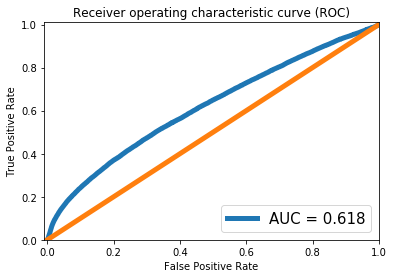

In [140]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

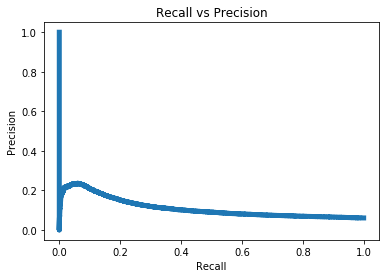

In [141]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

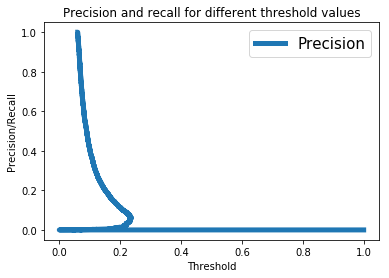

In [142]:
plt.plot( precision_rt[1:], recall_rt[1:],label="Precision",linewidth=5)

plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [143]:
error_df

,Reconstruction_error,True_class
1146058,2991.075823,0
1435373,4774.439156,0
105319,3537.577676,0
1134544,3400.511156,0
229415,3645.935563,0
959350,3490.241156,0
1116973,3085.755676,0
496561,3976.296069,0
444470,3525.331989,0
11369,5677.307102,0


## Test for patients with sepsis

In [178]:
d = pd.concat([error_df.iloc[1:200,],error_df.iloc[381474:381675,]], axis=0)
d.shape

(400, 2)

In [180]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(d.True_class, d.Reconstruction_error)

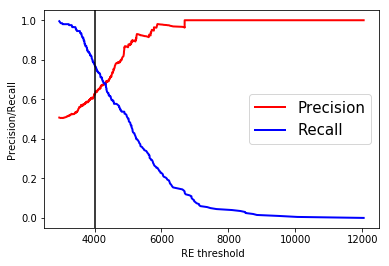

In [193]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=2, color='red')
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=2, color='blue')
#plt.title('Precision and recall for different threshold values', size = 20)
plt.xlabel(' RE threshold', size = 10)
plt.ylabel('Precision/Recall', size = 10)
plt.yticks(size = 10);
plt.legend()
plt.axvline(x=4000, color='k')
plt.savefig('precisionrecall.png')

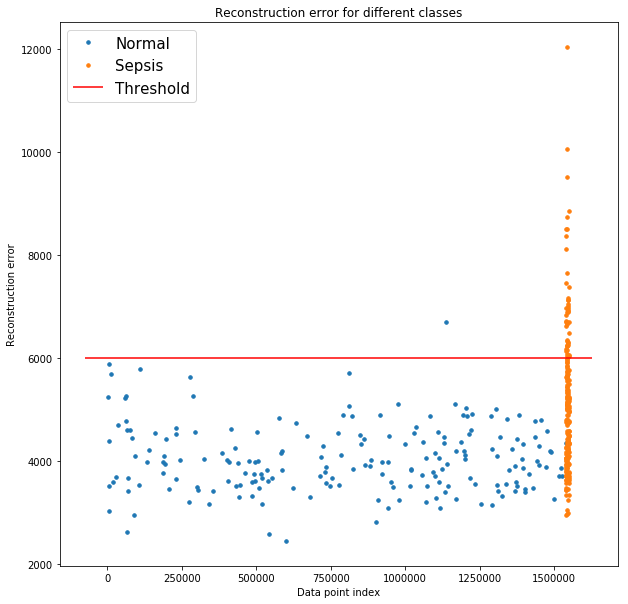

In [190]:
threshold_fixed = 6000
groups = d.groupby('True_class')
fig, ax = plt.subplots(figsize=(10,10))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Sepsis" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

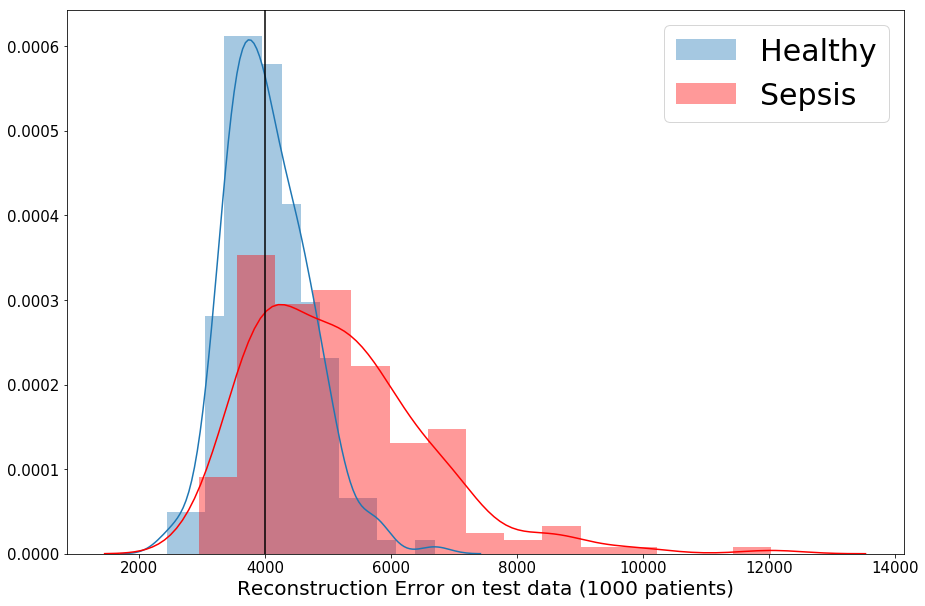

In [194]:
fig = plt.subplots(figsize=(15, 10))
sns.distplot(d[d["True_class"]==0].Reconstruction_error,  rug=False, label="Healthy")
sns.distplot(d[d["True_class"]==1].Reconstruction_error, rug=False,  label="Sepsis",  color='red');
plt.legend(loc=1, prop={'size': 30})
plt.xticks(size =15)
plt.rc('legend', fontsize=15)   
#plt.title("Reconstruction Error on Test data", size =20)
plt.axvline(x=4000, color='k')
plt.xlabel('Reconstruction Error on test data (1000 patients)', size = 20)
plt.savefig('imbalanced_dataset.png')
plt.yticks(size = 15);
plt.savefig('autoencoder.png')

In [195]:
# create another feature RE
data = X_tr
y = data.SepsisLabel
data.drop(['SepsisLabel','ID'], axis = 1, inplace = True)

In [ ]:
data = data.values

In [ ]:
allpredictions = loaded_model.predict(data)


In [ ]:
mse = np.mean(np.power(data - allpredictions, 2), axis=1)
f = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class':y})
f.describe()

In [ ]:
len(f.Reconstruction_error)

In [ ]:
np.savetxt("REfromAENN.csv", f.Reconstruction_error, fmt='%s')

## Classification

In [57]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import glob
from sklearn import linear_model
import datetime
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import learning_curve, GridSearchCV
from random import sample 
from sklearn.linear_model import LogisticRegression


In [58]:
X_tr = pd.read_csv('SEPSIS_ALL.csv')
X_tr.shape

(1552210, 43)

In [59]:
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb',  'Unnamed: 0','Fibrinogen', 'Platelets',
 'Unit1', "Unit2"], axis = 1, inplace = True)


data = X_tr[(X_tr['Bilirubin_direct']).notnull()]
data2 = X_tr[(X_tr['Lactate']).notnull()]
data3 = X_tr[(X_tr['PTT']).notnull()] 
data4 = X_tr[(X_tr['Creatinine']).notnull()] 
data5 = X_tr[(X_tr['WBC']).notnull()] 
data6 = X_tr[(X_tr['Glucose']).notnull()]
#healthy patients
BR_healthy = sum(data[data.SepsisLabel ==0].Bilirubin_direct)/len(data[data.SepsisLabel ==0].Bilirubin_direct)
lact_healthy = sum(data2[data2.SepsisLabel ==0].Lactate)/len(data2[data2.SepsisLabel ==0].Lactate)
ptt_healthy = sum(data3[data3.SepsisLabel ==0].PTT)/len(data3[data3.SepsisLabel ==0].PTT)
creat_healthy = sum(data4[data4.SepsisLabel ==0].Creatinine)/len(data4[data4.SepsisLabel ==0].Creatinine)
WBC_healthy = sum(data5[data5.SepsisLabel ==0].WBC)/len(data5[data5.SepsisLabel ==0].WBC)
glucose_healthy = sum(data6[data6.SepsisLabel ==0].Glucose)/len(data6[data6.SepsisLabel ==0].Glucose)

# sepsis patients
BR_sepsis = sum(data[data.SepsisLabel ==1].Bilirubin_direct)/len(data[data.SepsisLabel ==1].Bilirubin_direct)
lact_sepsis = sum(data2[data2.SepsisLabel ==1].Lactate)/len(data2[data2.SepsisLabel ==1].Lactate)
ptt_sepsis= sum(data3[data3.SepsisLabel ==1].PTT)/len(data3[data3.SepsisLabel ==1].PTT)
creat_sepsis = sum(data4[data4.SepsisLabel ==1].Creatinine)/len(data4[data4.SepsisLabel ==1].Creatinine)
WBC_sepsis = sum(data5[data5.SepsisLabel ==1].WBC)/len(data5[data5.SepsisLabel ==1].WBC)
glucose_sepsis = sum(data6[data6.SepsisLabel ==1].Glucose)/len(data6[data6.SepsisLabel ==1].Glucose)
healthy = X_tr[X_tr.SepsisLabel == 0]
sepsis = X_tr[X_tr.SepsisLabel == 1]

healthy['Bilirubin_direct'].fillna(value=BR_healthy, inplace=True)
healthy['Lactate'].fillna(value=lact_healthy, inplace=True)
healthy['PTT'].fillna(value=ptt_healthy, inplace=True)
healthy['Creatinine'].fillna(value=creat_healthy, inplace=True)
healthy['WBC'].fillna(value=WBC_healthy, inplace=True)
healthy['Glucose'].fillna(value=glucose_healthy , inplace=True)

sepsis['Bilirubin_direct'].fillna(value=BR_sepsis, inplace=True)
sepsis['Lactate'].fillna(value=lact_sepsis, inplace=True)
sepsis['PTT'].fillna(value=ptt_sepsis, inplace=True)
sepsis['Creatinine'].fillna(value=creat_sepsis, inplace=True)
sepsis['WBC'].fillna(value=WBC_sepsis, inplace=True)
sepsis['Glucose'].fillna(value=glucose_sepsis, inplace=True)


sepsis.fillna(method='bfill', inplace=True)
sepsis.fillna(method='ffill', inplace=True)
healthy.fillna(method='bfill', inplace=True)
healthy.fillna(method='ffill', inplace=True)

X_tr = pd.concat([sepsis, healthy]).sort_index()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [60]:
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

In [61]:
X_tr.shape

(1552210, 19)

In [62]:
df = pd.read_csv('patients_train_today.csv')
len(df.ID.unique())

34836

In [63]:
total  = list(set(X_tr.ID.unique()) - set(df.ID.unique()) )

In [64]:
Y_tr = df.SepsisLabel
df.drop(['SepsisLabel','ID','Unnamed: 0', 'O2Sat','HospAdmTime'], axis = 1, inplace = True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df,Y_tr,test_size=.3, random_state=10)

In [70]:
test_x_predictions = loaded_model.predict(X_train)
mse = np.mean(np.power(X_train- test_x_predictions, 2), axis=1)
X_train['RE']  = mse

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
test_x_predictions = loaded_model.predict(X_test)
mse = np.mean(np.power(X_test- test_x_predictions, 2), axis=1)
X_test['RE']  =mse

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
X_train.shape

(937561, 16)

In [ ]:
clfs = {}

clfs['reg'] = {'clf': LogisticRegression(), 'name': 'LogisticRegression'}
clfs['gbc'] = {'clf': GradientBoostingClassifier(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestClassifier( n_jobs=-1), 'name':'RandomForest'}
clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}




def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], X_train,y_train, cv=5,scoring='roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

Evaluation(clfs)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression: 0.9966 (+/- 0.0017)
GradientBoostingClassifier: 1.0000 (+/- 0.0000)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

RandomForest: 1.0000 (+/- 0.0001)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
class_weights=  {0: 1.,
                1: 10.}

clf1 = LogisticRegression(random_state=0, solver='lbfgs', class_weight=class_weights).fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [74]:
clf2 = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)

In [75]:
clf3 = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

In [76]:
clf4 = RandomForestClassifier( n_estimators=100, criterion ='gini').fit(X_train, y_train)

In [77]:
clf5 = DecisionTreeClassifier(criterion ='gini', class_weight=class_weights).fit(X_train, y_train)

In [78]:
clf6 = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)

In [28]:
def compute_auc(labels, predictions):
    # Check inputs for errors.

    # Find prediction thresholds.
    thresholds = np.unique(predictions)[::-1]
    if thresholds[0] != 1:
        thresholds = np.concatenate((np.array([1]), thresholds))

    if thresholds[-1] != 0:
        thresholds = np.concatenate((thresholds, np.array([0])))
    m = len(thresholds)

    # Populate contingency table across prediction thresholds.
    tp = np.zeros(m)
    fp = np.zeros(m)
    fn = np.zeros(m)
    tn = np.zeros(m)

    # Find indices that sort predicted probabilities from largest to smallest.
    idx = np.argsort(predictions)[::-1]

    i = 0
    for j in range(m):
        # Initialize contingency table for j-th prediction threshold.
        if j == 0:
            tp[j] = 0
            fp[j] = 0
            fn[j] = np.sum(labels == 1)
            tn[j] = np.sum(labels == 0)
        else:
            tp[j] = tp[j - 1]
            fp[j] = fp[j - 1]
            fn[j] = fn[j - 1]
            tn[j] = tn[j - 1]

        # Update contingency table for i-th largest prediction probability.
        while i < n and predictions[idx[i]] >= thresholds[j]:
            if labels[idx[i]]:
                tp[j] += 1
                fn[j] -= 1
            else:
                fp[j] += 1
                tn[j] -= 1
            i += 1

    # Summarize contingency table.
    tpr = np.zeros(m)
    tnr = np.zeros(m)
    ppv = np.zeros(m)
    npv = np.zeros(m)

    for j in range(m):
        if tp[j] + fn[j]:
            tpr[j] = tp[j] / (tp[j] + fn[j])
        else:
            tpr[j] = 1
        if fp[j] + tn[j]:
            tnr[j] = tn[j] / (fp[j] + tn[j])
        else:
            tnr[j] = 1
        if tp[j] + fp[j]:
            ppv[j] = tp[j] / (tp[j] + fp[j])
        else:
            ppv[j] = 1
        if fn[j] + tn[j]:
            npv[j] = tn[j] / (fn[j] + tn[j])
        else:
            npv[j] = 1

    # Compute AUROC as the area under a piecewise linear function of TPR /
    # sensitivity (x-axis) and TNR / specificity (y-axis) and AUPRC as the area
    # under a piecewise constant of TPR / recall (x-axis) and PPV / precision
    # (y-axis).
    auroc = 0
    auprc = 0
    for j in range(m-1):
        auroc += 0.5 * (tpr[j + 1] - tpr[j]) * (tnr[j + 1] + tnr[j])
        auprc += (tpr[j + 1] - tpr[j]) * ppv[j + 1]

    return auroc, auprc

# The compute_accuracy_f_measure function computes the accuracy and F-measure
# for a patient.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a binary vector, where predictions[i] == 0 if the patient
#   is not predicted to be septic at time i and predictions[i] == 1 if the
#   patient is predicted to be septic at time i.  Note that there must be a
#   prediction for every label, i.e, len(labels) == len(predictions).
#
# Output:
#   'accuracy' is a scalar that gives the accuracy of the classifier using its
#   binarized predictions.
#
#   'f_measure' is a scalar that gives the F-measure of the classifier using its
#   binarized predictions.
#
# Example:
#   In [1]: labels = [0, 0, 0, 0, 1, 1]
#   In [2]: predictions = [0, 0, 1, 1, 1, 1]
#   In [3]: accuracy, f_measure = compute_prediction_utility(labels, predictions)
#   In [4]: accuracy
#   Out[4]: 0.666666666667
#   In [5]: f_measure
#   Out[5]: 0.666666666667

def compute_accuracy_f_measure(labels, predictions):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not predictions[i] in (0, 1):
            raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

    # Populate contingency table.
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    for i in range(n):
        if labels[i] and predictions[i]:
            tp += 1
        elif labels[i] and not predictions[i]:
            fp += 1
        elif not labels[i] and predictions[i]:
            fn += 1
        elif not labels[i] and not predictions[i]:
            tn += 1

    # Summarize contingency table.
    if tp + fp + fn + tn:
        accuracy = float(tp + tn) / float(tp + fp + fn + tn)
    else:
        accuracy = 1.0

    if 2 * tp + fp + fn:
        f_measure = float(2 * tp) / float(2 * tp + fp + fn)
    else:
        f_measure = 1.0

    return accuracy, f_measure

# The compute_prediction_utility function computes the total time-dependent
# utility for a patient.
#
# Inputs:
#   'labels' is a binary vector, where labels[i] == 0 if the patient is not
#   labeled as septic at time i and labels[i] == 1 if the patient is labeled as
#   septic at time i.
#
#   'predictions' is a binary vector, where predictions[i] == 0 if the patient
#   is not predicted to be septic at time i and predictions[i] == 1 if the
#   patient is predicted to be septic at time i.  Note that there must be a
#   prediction for every label, i.e, len(labels) == len(predictions).
#
# Output:
#   'utility' is a scalar that gives the total time-dependent utility of the
#   classifier using its binarized predictions.
#
# Example:
#   In [1]: labels = [0 0 0 0 1 1]
#   In [2]: predictions = [0 0 1 1 1 1]
#   In [3]: utility = compute_prediction_utility(labels, predictions)
#   In [4]: utility
#   Out[4]: 0.444444444444

def compute_prediction_utility(labels, predictions, dt_early=-12, dt_optimal=-6, dt_late=3.0, max_u_tp=1, min_u_fn=-2, u_fp=-0.05, u_tn=0):
    # Check inputs for errors.
    if len(predictions) != len(labels):
        raise Exception('Numbers of predictions and labels must be the same.')

    n = len(labels)
    for i in range(n):
        if not labels[i] in (0, 1):
            raise Exception('Labels must satisfy label == 0 or label == 1.')

    for i in range(n):
        if not predictions[i] in (0, 1):
            raise Exception('Predictions must satisfy prediction == 0 or prediction == 1.')

    if dt_early >= dt_optimal:
        raise Exception('The earliest beneficial time for predictions must be before the optimal time.')

    if dt_optimal >= dt_late:
        raise Exception('The optimal time for predictions must be before the latest beneficial time.')

    # Does the patient eventually have sepsis?
    if any(labels):
        is_septic = True
        t_sepsis = min(i for i, label in enumerate(labels) if label) - dt_optimal
    else:
        is_septic = False
        t_sepsis = float('inf')

    # Define slopes and intercept points for affine utility functions of the
    # form u = m * t + b.
    m_1 = float(max_u_tp) / float(dt_optimal - dt_early)
    b_1 = -m_1 * dt_early
    m_2 = float(-max_u_tp) / float(dt_late - dt_optimal)
    b_2 = -m_2 * dt_late
    m_3 = float(min_u_fn) / float(dt_late - dt_optimal)
    b_3 = -m_3 * dt_optimal

    # Compare predicted and true conditions.
    u = np.zeros(n)
    for t in range(n):
        if t <= t_sepsis + dt_late:
            # TP
            if is_septic and predictions[t]:
                if t <= t_sepsis + dt_optimal:
                    u[t] = max(m_1 * (t - t_sepsis) + b_1, u_fp)
                elif t <= t_sepsis + dt_late:
                    u[t] = m_2 * (t - t_sepsis) + b_2
            # FN
            elif is_septic and not predictions[t]:
                if t <= t_sepsis + dt_optimal:
                    u[t] = 0
                elif t <= t_sepsis + dt_late:
                    u[t] = m_3 * (t - t_sepsis) + b_3
            # FP
            elif not is_septic and predictions[t]:
                u[t] = u_fp
            # TN
            elif not is_septic and not predictions[t]:
                u[t] = u_tn

    # Find total utility for patient.
    return np.sum(u)

def get_parser():
    parser = argparse.ArgumentParser(description = 'Evaluate classifiers for cohort.')
    parser.add_argument('-l', '--labels_directory',      type=str, required=True,  help='Labels directory')
    parser.add_argument('-p', '--predictions_directory', type=str, required=True,  help='Predictions directory')
    parser.add_argument('-o', '--output_file',           type=str, required=False, help='Output filename')
    return parser

def run(args):
    auroc, auprc, accuracy, f_measure, utility = compute_scores_2019(args.labels_directory, args.predictions_directory)

    output_string = 'AUROC|AUPRC|Accuracy|F-measure|Utility\n{}|{}|{}|{}|{}'.format(auroc, auprc, accuracy, f_measure, utility)

    if args.output_file:
        with open(args.output_file, 'w') as f:
            f.write(output_string)
    else:
        print(output_string)


In [79]:
def code(file) :
    data = pd.read_csv(file , sep='|')
    data.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride','Magnesium','Phosphate','O2Sat',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','Fibrinogen', 'Platelets','HospAdmTime',
    'Unit1', "Unit2"], axis = 1, inplace = True)
    
    if sum(pd.isna(data['Bilirubin_direct'])) !=0 : 
        data['Bilirubin_direct'] =  [2.32] * len(data['Bilirubin_direct'] )  

    if sum(pd.isna(data['Lactate'])) !=0 : 
        data['Lactate'] =  [2.68] * len(data['Lactate'] )

    if sum(pd.isna(data['PTT'])) !=0 : 
        data['PTT'] =  [42.57] * len(data['PTT'] )

    if sum(pd.isna(data['Creatinine'])) !=0 : 
        data['Creatinine'] =  [1.68] * len(data['Creatinine'] )

    if sum(pd.isna(data['WBC'])) !=0 : 
        data['WBC'] =  [12.36] * len(data['WBC'] )

    if sum(pd.isna(data['Glucose'])) !=0 : 
        data['Glucose'] =  [138.45] * len(data['Glucose'] )

    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    
    Y_te = data.SepsisLabel
    data.drop(['SepsisLabel'], axis = 1, inplace = True)
    
    col = data.columns
    if sum(pd.isna(data['MAP'])) !=0 : 
        data['MAP'] =  [87] * len(data['MAP'] )
    if sum(pd.isna(data['Temp'])) !=0 : 
        data['Temp'] =  [36.7] * len(data['Temp'] )
    if sum(pd.isna(data['HR'])) !=0 : 
        data['HR'] =  [83.9] * len(data['HR'] )
    if sum(pd.isna(data['Resp'])) !=0  :
        data['Resp'] =  [19.5] * len(data['Resp'] )
    if sum(pd.isna(data['DBP'])) !=0  :
        data['DBP'] =  [63.7] * len(data['DBP'] )
    if sum(pd.isna(data['SBP'])) !=0  :
        data['SBP'] =  [123.9] * len(data['SBP'] )
    
   

    test_x_predictions = loaded_model.predict(data)
    mse = np.mean(np.power(data - test_x_predictions, 2), axis=1)
    
    data['RE'] = mse

        
    return(data, Y_te) 


In [80]:
file ="all-files/p000229.psv"  
Y_te = code(file)[1]
X_te = code(file)[0]

In [81]:
X_te.shape

(27, 16)

In [86]:
utility = []
optimal = []
acc=[]
nopred=[]

clf = clf1
for file in total:
    
    Y_te = code('all-files/'+file)[1]
    X_te = code('all-files/'+file)[0]
    
    
   
    probabilities = clf.predict(X_te)
    

    predictions = [] 
    for i in range (len(probabilities)):
        if probabilities[i] < 0.5 :   # 1 0.35
            predictions.append(0)
        else :
            predictions.append(1)



    labels = Y_te
   
    fake = []
    for i in labels :
        fake.append(1-i)
    
        
    n = len(labels)
    
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    cohort_labels.append(labels)
    cohort_predictions.append(predictions)
    cohort_probabilities.append(probabilities)
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    auroc, auprc        = compute_auc(labels, probabilities)
    accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
    acc.append(accuracy)
    utility.append(compute_prediction_utility(labels, predictions))
    optimal.append(compute_prediction_utility(labels, labels))
    nopred.append(compute_prediction_utility(labels, fake))

In [87]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

0.6079167327192111